In [ ]:
import kagglehub

In [ ]:
path = kagglehub.dataset_download("abdulhasibuddin/plant-doc-dataset")

100%|██████████| 882M/882M [00:09<00:00, 99.8MB/s]

Extracting files...


In [ ]:
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/abdulhasibuddin/plant-doc-dataset/versions/1


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2

In [ ]:
import os
print(os.listdir(path+"/PlantDoc-Dataset/train/Cherry leaf"))

['Cherry leaf (44).jpg', 'Cherry leaf (17).jpg', 'Cherry leaf (26).jpg', 'Cherry leaf (32).jpg', 'Cherry leaf (40).jpg', 'Cherry leaf (22).jpg', 'Cherry leaf (28).jpg', 'Cherry leaf (37).jpg', 'Cherry leaf (30).jpg', 'Cherry leaf (34).jpg', 'Cherry leaf (2).jpg', 'Cherry leaf (24).jpg', 'Cherry leaf (46).jpg', 'Cherry leaf (27).jpg', 'Cherry leaf (18).jpg', 'Cherry leaf (7).jpg', 'Cherry leaf (8).jpg', 'Cherry leaf (13).jpg', 'Cherry leaf (12).jpg', 'Cherry leaf (14).jpg', 'Cherry leaf (1).jpg', 'Cherry leaf (43).jpg', 'Cherry leaf (19).jpg', 'Cherry leaf (38).jpg', 'Cherry leaf (41).jpg', 'Cherry leaf (15).jpg', 'Cherry leaf (42).jpg', 'Cherry leaf (33).jpg', 'Cherry leaf (35).jpg', 'Cherry leaf (45).jpg', 'Cherry leaf (11).jpg', 'Cherry leaf (31).jpg', 'Cherry leaf (6).jpg', 'Cherry leaf (16).jpg', 'Cherry leaf (36).jpg', 'Cherry leaf (5).jpg', 'Cherry leaf (9).jpg', 'Cherry leaf (29).jpg', 'Cherry leaf (47).jpg', 'Cherry leaf (21).jpg', 'Cherry leaf (25).jpg', 'Cherry leaf (10).jpg'

In [ ]:
print(len(os.listdir(path+"/PlantDoc-Dataset/train/Cherry leaf")))

47


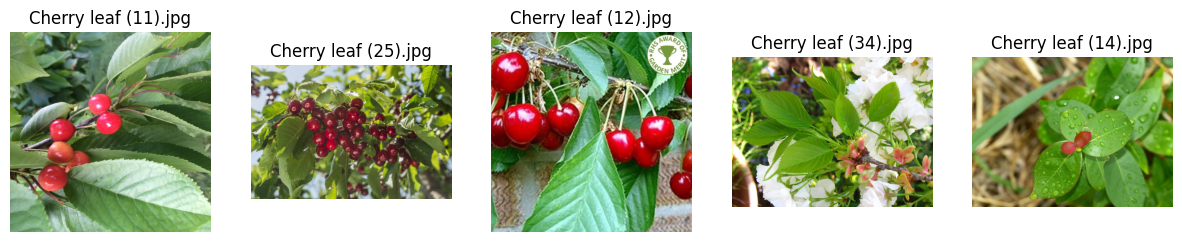

In [ ]:
cherry_leaf_dir=path+"/PlantDoc-Dataset/train/Cherry leaf"
image_files = os.listdir(cherry_leaf_dir)
sample_images = random.sample(image_files, min(5, len(image_files)))


fig, axes = plt.subplots(1, len(sample_images), figsize=(15, 5))

for ax, img_name in zip(axes, sample_images):
    img_path = os.path.join(cherry_leaf_dir, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  #
    ax.imshow(img)
    ax.set_title(img_name)
    ax.axis("off")

plt.show()

In [ ]:
base_dir = path

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   #rotation_range=180,
                                   validation_split=0.2
                                  )
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
img_size = (224, 224)

In [ ]:
def load_data(directory):
    images = []
    labels = []
    class_names = sorted(os.listdir(directory))  # Get sorted class names

    for class_name in class_names:
        class_path = os.path.join(directory, class_name)
        if not os.path.isdir(class_path):  # Skip non-directory files
            continue

        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            try:
                img = load_img(img_path, target_size=img_size)  # Load image
                img_array = img_to_array(img) / 255.0  # Normalize pixel values
                images.append(img_array)
                labels.append(class_name)  # Store label as string
            except Exception as e:
                print(f"Error loading {img_path}: {e}")

    return np.array(images), np.array(labels), class_names

In [ ]:
x_train, y_train, class_names = load_data(train_dir)
x_test, y_test, _ = load_data(test_dir)

In [ ]:
print(f"Training samples: {x_train.shape}, Test samples: {x_test.shape}")


Training samples: (2316, 224, 224, 3), Test samples: (236, 224, 224, 3)


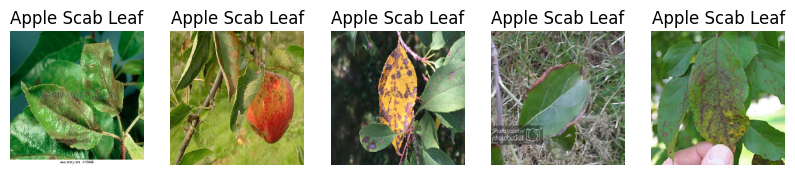

In [ ]:
import matplotlib.pyplot as plt

# Show some sample images with labels
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[np.argmax(y_train[i])])  # Convert one-hot to label
    plt.axis("off")

plt.show()

In [ ]:
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [ ]:
from tensorflow import keras

# Define the ANN model
model = keras.Sequential([
    keras.layers.Input(shape=(784,)),  # Explicit Input Layer
    keras.layers.Dense(128, activation='relu'),  # Hidden layer 1
    keras.layers.Dense(64, activation='relu'),  # Hidden layer 2
    keras.layers.Dense(10, activation='softmax')  # Output layer (10 classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")


x_train shape: (444672, 784)
y_train shape: (2316, 27)
x_test shape: (45312, 784)
y_test shape: (236, 27)


In [ ]:
print(f"Number of images in train set: {len(x_train)}")
print(f"Number of labels in train set: {len(y_train)}")

print(f"Number of images in test set: {len(x_test)}")
print(f"Number of labels in test set: {len(y_test)}")

Number of images in train set: 444672
Number of labels in train set: 2316
Number of images in test set: 45312
Number of labels in test set: 236
